# Feature Selection Methods

1)Univariate Selection

In [5]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("train.csv")
data.shape

(2000, 21)

In [7]:
X = data.iloc[:,0:20] 
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [10]:
y = data.iloc[:,-1]    
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [11]:
bestfeatures = SelectKBest(score_func=chi2, k=10)     #apply SelectKBest class to extract top 10 best features
bestfeatures


SelectKBest(k=10, score_func=<function chi2 at 0x000000A40262A378>)

In [12]:
fit = bestfeatures.fit(X,y)
fit

SelectKBest(k=10, score_func=<function chi2 at 0x000000A40262A378>)

In [22]:
dfscores = pd.DataFrame(fit.scores_)
dfscores.head()

,0
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166


In [23]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [24]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1) #concat two dataframes 
featureScores.head()

,0,0
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166


In [16]:
featureScores.columns = ['Specs','Score']  #naming columns
featureScores.columns

Index(['Specs', 'Score'], dtype='object')

In [17]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


2) Features Important

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model

C:\Users\Dell\Anaconda3\ANA\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [19]:
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [20]:
print(model.feature_importances_)    #use inbuilt class feature_importances of tree based classifiers

[0.05869549 0.02286523 0.03263588 0.02219482 0.03308058 0.01929402
 0.0384039  0.0377936  0.03763257 0.03366516 0.03551343 0.05042226
 0.05082658 0.37037009 0.03357724 0.03702146 0.03614951 0.01471673
 0.01612528 0.01901619]


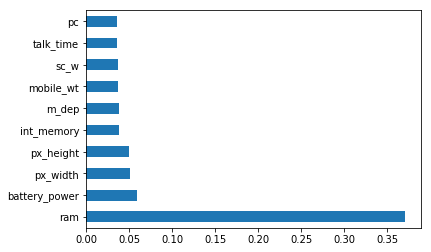

In [21]:
#Plot the graph of that important features 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) #Plot the graph of that important features 
feat_importances.nlargest(10).plot(kind='barh')
plt.show()